# A linear regression learning algorithm example using TensorFlow library.

# How to use TensorBoard in Colab
## Download and unzip ngrok

In [1]:
! wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
! unzip ngrok-stable-linux-amd64.zip --y

--2018-06-13 20:52:05--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 34.224.230.241, 34.225.24.230, 34.231.150.116, ...
Connecting to bin.equinox.io (bin.equinox.io)|34.224.230.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5363700 (5.1M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.13’

ngrok-stable-linux- 100%[===================>]   5.11M  10.1MB/s    in 0.5s    

2018-06-13 20:52:06 (10.1 MB/s) - ‘ngrok-stable-linux-amd64.zip.13’ saved [5363700/5363700]

Archive:  ngrok-stable-linux-amd64.zip
caution: filename not matched:  --y


##Run TensorBoard


In [0]:
LOG_DIR = './log'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

##Run ngrok

In [0]:
get_ipython().system_raw('./ngrok http 6006 &')

##Get URL

In [4]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

http://cd6f37bf.ngrok.io


# Train the model with tensorboard summaries

Linear regression model is one of the simplest regression models. It assumes linear relationship between X and Y. The output equation is defined as follows:
$$\hat{y} = WX + b$$


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [0]:
#  Training Parameters
learning_rate = 0.001
training_epochs = 10000
display_step = 200

200
(200, 1) (200, 1)


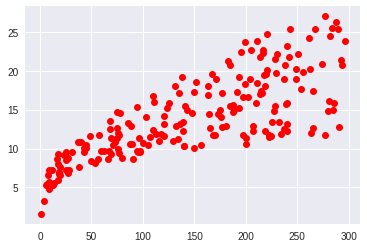

In [7]:
# Load data. Advertising dataset from "An Introduction to Statistical Learning",
# textbook by Gareth James, Robert Tibshirani, and Trevor Hastie 
import numpy as np
data = pd.read_csv('https://raw.githubusercontent.com/DataScienceUB/DeepLearningfromScratch2017/master/dataset/Advertising.csv',index_col=0, delimiter=',')
train_X = data[['TV']].values 

train_Y = data.Sales.values 
train_Y = train_Y[:,np.newaxis]

n_samples = train_X.shape[0]
print n_samples
print train_X.shape, train_Y.shape
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.show()

In [0]:
import tensorflow as tf
# Define tf Graph Inputs
X = tf.placeholder("float",[None,1])
y = tf.placeholder("float",[None,1])

# Create Model variables 
# Set model weights
W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

# Construct a linear model
y_pred = tf.add(tf.multiply(X, W), b)

In [0]:
# Minimize the squared errors
cost = tf.reduce_sum(tf.pow(y_pred-y,2))/(2*n_samples) #L2 loss

# Define the optimizer
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost) #Gradient descent

In [0]:
# Add summary ops to collect data
w_hist = tf.summary.histogram("weights", W)
b_hist = tf.summary.histogram("biases", b)
y_hist = tf.summary.histogram("y", y_pred)

cost_summary = tf.summary.scalar("cost", cost)

# Merge all the summaries and write them out to /tmp/linear_regression
merged = tf.summary.merge_all()


Epoch: 0001 cost= 8810.703125000 W= -0.6894207 b= -1.3411077
Epoch: 0201 cost= 5048.647460938 W= -0.500618 b= -1.1520994
Epoch: 0401 cost= 2661.365966797 W= -0.3393883 b= -0.9900558
Epoch: 0601 cost= 1271.116333008 W= -0.20717394 b= -0.85618573
Epoch: 0801 cost= 542.542724609 W= -0.10420147 b= -0.75045925
Epoch: 1001 cost= 206.509521484 W= -0.029021127 b= -0.6711899
Epoch: 1201 cost= 73.067291260 W= 0.02177902 b= -0.6148045
Epoch: 1401 cost= 28.344144821 W= 0.053186923 b= -0.57625353
Epoch: 1601 cost= 15.910450935 W= 0.07077963 b= -0.54997903
Epoch: 1801 cost= 13.080209732 W= 0.07962239 b= -0.53095925
Epoch: 2001 cost= 12.548313141 W= 0.08356252 b= -0.5153671
Epoch: 2201 cost= 12.450679779 W= 0.08508392 b= -0.5006927
Epoch: 2401 cost= 12.414784431 W= 0.085560046 b= -0.48548976
Epoch: 2601 cost= 12.383067131 W= 0.08564154 b= -0.46899694
Epoch: 2801 cost= 12.348598480 W= 0.08559098 b= -0.45081452
Epoch: 3001 cost= 12.310529709 W= 0.08549743 b= -0.4306954
Epoch: 3201 cost= 12.268524170 W=

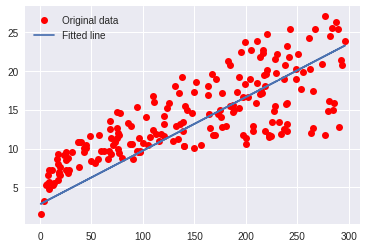

In [11]:
import time

# Initializing the variables
init = tf.global_variables_initializer()
# Launch the graph
with tf.Session() as sess:
    summary_writer = tf.summary.FileWriter(LOG_DIR, graph=tf.get_default_graph())
    
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        _,_,summary = sess.run([optimizer, cost, merged], feed_dict={X: train_X, y: train_Y}) 
        summary_writer.add_summary(summary, epoch)
        #Display logs per epoch step
        if epoch % display_step == 0:
            print "Epoch:", '%04d' % (epoch+1), "cost=", \
                "{:.9f}".format(sess.run(cost, feed_dict={X: train_X, y:train_Y})), \
                "W=", sess.run(W), "b=", sess.run(b)

    print "Optimization Finished!"
    print "cost=", sess.run(cost, feed_dict={X: train_X, y: train_Y}), \
          "W=", sess.run(W), "b=", sess.run(b)

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

In [0]:
#!nohup tensorboard --logdir .

In [13]:
ls log

events.out.tfevents.1528923135.a85a5d1dfbb6


In [14]:
!ps aux | grep tensorboard

root      2382 32.4  1.4 877672 196460 ?       Sl   20:52   0:08 /usr/bin/python2 /usr/local/bin/tensorboard --logdir ./log --host 0.0.0.0 --port 6006
root      2497 54.5  0.0  33960  5096 pts/1    Ss+  20:52   0:01 /bin/sh -c ps aux | grep tensorboard
root      2499  0.0  0.0  38200  5608 pts/1    S+   20:52   0:00 grep tensorboard


In [0]:
#!kill 408

In [0]:
#!rm -rf log